## 2.1 데이터셋

### 2.1.1 허깅페이스 데이터셋 처음 사용하기

In [1]:
from datasets import list_datasets

In [2]:
all_datasets = list_datasets()
print(f'현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.')
print(f'처음 10개 데이터셋: {all_datasets[:10]}')

현재 허브에는 17970개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
from datasets import load_dataset

In [4]:
emotions = load_dataset('SetFit/emotion')  # emotion 으로 불러올 시 에러남

Using custom data configuration SetFit___emotion-89147fdf376d67e2
Reusing dataset json (/home/heerak/.cache/huggingface/datasets/json/SetFit___emotion-89147fdf376d67e2/0.0.0/c2d554c3377ea79c7664b93dc65d0803b45e3279000f993c7bfd18937fd7f426)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
# SetFit/emotion 데이터셋의 경우 수동으로 ClassLabel 객체를 만들어 label에 할당합니다.
from datasets import ClassLabel

In [6]:
emotions['train'].features['label'] = ClassLabel(
    num_classes=6,
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [7]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 16000
})

In [9]:
len(train_ds)

16000

In [10]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0, 'label_text': 'sadness'}

In [11]:
train_ds.column_names

['text', 'label', 'label_text']

In [12]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None), 'label_text': Value(dtype='string', id=None)}


In [13]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3], 'label_text': ['sadness', 'sadness', 'anger', 'love', 'anger']}


In [14]:
print(train_ds['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


#### 허브에 필요한 데이터셋이 없다면 어떻게 하나요?

```
# dataset 다운로드
dataset_url = 'https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt'
!wget {dataset_url}

# train.txt 파일의 첫 행 출력
!head -n 1 train.txt

# csv 스크립트와 data_files 매개변수를 사용해 로컬에 있는 train.txt 파일을 로드할 수 있음
emotions_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text', 'label'])

# data_files 매개변수에 URL 자체를 지정하는 방법도 있음
dataset_url = 'https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1'
emotions_remote = load_dataset('csv', data_files=dataset_url, sep=';', names=['text', 'label'])
```

### 2.1.2 데이터셋에서 데이터프레임으로

In [15]:
import pandas as pd

In [16]:
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [17]:
# ClassLabel 클래스 객체는 정수 레이블을 클래스 이름으로 바꿔주는 int2str() 메서드와 
# 그 반대 작업을 수행하는 str2int() 메서드가 있음
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

In [18]:
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_text,label_name
0,i didnt feel humiliated,0,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love
4,i am feeling grouchy,3,anger,anger


### 2.1.3 클래스 분포 살펴보기

In [19]:
import matplotlib.pyplot as plt

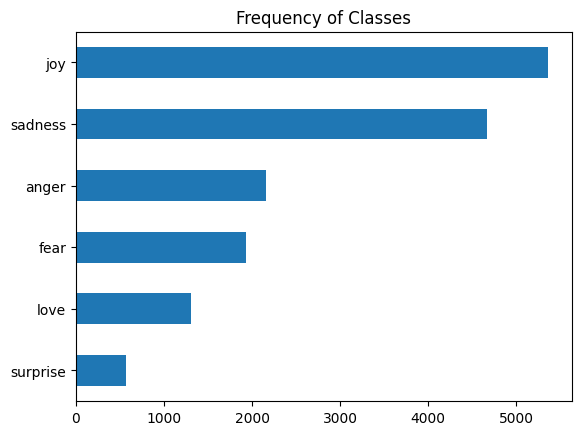

In [20]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

### 2.1.4 트윗 길이 확인

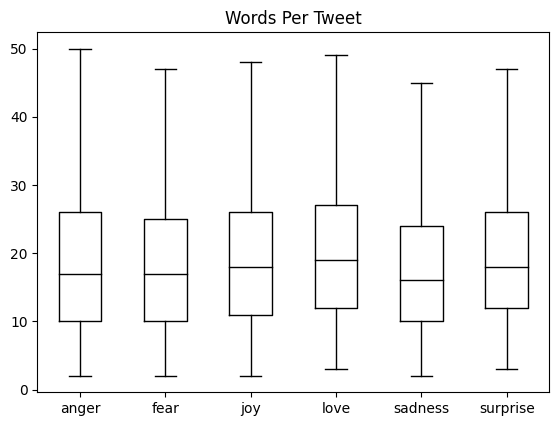

In [21]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False,
           showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [22]:
emotions.reset_format()

## 2.2 텍스트에서 토큰으로

### 2.2.1 문자 토큰화

In [23]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [24]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [25]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [26]:
# 각 이름을 고유한 아이디로 매핑하는 방법
categorical_df = pd.DataFrame(
    {'Name': ['Bumblebee', 'Optimus Prime', 'Megatron'], "Label ID": [0, 1, 2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


이 방식은 이름 사이에 가상의 순서가 만들어진다는 문제가 있음<br>신경망은 이런 종류의 관계를 학습하는 능력이 매우 뛰어남

In [27]:
# 범주마다 새 열을 만들어 이름이 범주에 해당하면 1, 그렇지 않으면 0을 할당하는 방법(원-핫 인코딩)
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [28]:
import torch
import torch.nn.functional as F

In [29]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

38개의 입력 토큰 각각에 20차원의 웟-핫 벡터가 만들어졌음

어휘 사전을 구성하는 고유한 문자가 20개이기 때문

> one_hot() 함수에 항상 num_classes 매개변수를 지정하는 것이 중요함<br>그렇지 않으면 입력 텐서에서 가장 큰 정수에 1을 더한 값을 클래스 개수로 사용하기 때문에 원-핫 벡터가 어휘사전 길이보다 더 짧아질 수 있음(수동으로 0으로 패딩해야 함)<br>tensorflow 에서는 tf.one_hot() 함수가 있고 depth 매개변수가 num_classes 의 역할을 함

In [30]:
print(f'토큰: {tokenized_text[0]}')
print(f'텐서 인덱스: {input_ids[0]}')
print(f'원-핫 인코딩: {one_hot_encodings[0]}')

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### 2.2.2 단어 토큰화

In [31]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### 2.2.3 부분단어(subword) 토큰화

In [32]:
from transformers import AutoTokenizer

2023-01-06 17:00:50.246247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 17:00:50.792606: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2023-01-06 17:00:50.792660: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2023-01-06 17:00:50.792666: W tensorflow

In [33]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [34]:
from transformers import DistilBertTokenizer

In [35]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

> AutoTokenizer.from_pretrained() 메서드를 호출하면 사전 훈련된 토크나이저의 파라미터를 허깅페이스 허브에서 로드하는 과정을 보여주는 진행 표시줄이 나타납니다. 이 코드를 두 번째 호출하면 캐시로부터 토크나이저를 로드합니다. 보통 캐시 위치는 ~/.cache/huggingface 입니다.

In [36]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [37]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [38]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [39]:
tokenizer.vocab_size

30522

In [40]:
tokenizer.model_max_length

512

In [41]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

> 사전 훈련된 모델을 사용할 때, 모델 훈련에 사용한 것과 동일한 토크나이저를 사용하는 것이 정말 중요함<br>모델 입장에서 토크나이저를 바꾸는 것은 어휘사전을 뒤섞는 것이나 다름없음<br>주변 사람들이 'house'를 'cat'이라 하는 등 마음대로 단어를 바꾼다면 도대체 무슨 일인지 상황을 이해하지 못할 것임

### 2.2.4 전체 데이터셋 토큰화하기

In [42]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [43]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [51]:
tokens2idx = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
tokens2idx

[('[UNK]', 100), ('[SEP]', 102), ('[PAD]', 0), ('[CLS]', 101), ('[MASK]', 103)]

In [52]:
data = sorted(tokens2idx, key=lambda x: x[-1])
data

[('[PAD]', 0), ('[UNK]', 100), ('[CLS]', 101), ('[SEP]', 102), ('[MASK]', 103)]

In [53]:
df = pd.DataFrame(data, columns=['Special Token', 'Special Token ID'])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [44]:
emotion_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Parameter 'function'=<function tokenize at 0x7fbf65a7d040> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [45]:
print(emotion_encoded['train'].column_names)

['attention_mask', 'input_ids', 'label', 'label_text', 'text']


In [50]:
print(emotion_encoded['train'][0])

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 0, 'label_text': 'sadness', 'text': 'i didnt feel humiliated'}


> 이어지는 장에서 배치에 있는 텐서에 동적으로 패딩 처리를 취하는 데이터 콜레이터(data collator)를 살펴보겠음<br>다음 절에서 보겠지만, 전역적인 패딩은 전체 말뭉치에서 특성 행렬(feature matrix)을 추출하는 데 도움이 됨

## 2.3 텍스트 분류 모델 훈련하기

### 2.3.1 트랜스포머를 특성 추출기로 사용하기

#### 사전 훈련된 모델 사용하기

In [54]:
from transformers import AutoModel

In [98]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

#### 프레임워크 간의 상호운영성

```
# TFAutoModel 클래스를 사용해 텐서플로에서 DistilBERT 모델을 로드
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)

# XLM-RoBERTa 모델은 파이토치 가중치만 있음. 따라서 텐서플로에서 다음처럼 로드하려면 오류 발생
tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base')

# 이 경우 TFAutoModel.from_pretrained() 함수에 from_pt=True 매개변수를 지정하면 라이브러리가 자동으로 파이토치 가중치를 다운로드해 변환함
tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base', from_pt=True)
```

#### 마지막 은닉 상태 추출하기

In [60]:
text = 'this is a test'
# return_tensors 매개변수를 지정하지 않으면 파이썬 리스트가 반환됨
inputs = tokenizer(text, return_tensors='pt')
print(f'입력 텐서 크기: {inputs["input_ids"].size()}')

입력 텐서 크기: torch.Size([1, 6])


텐서의 크기는 [batch_size, n_tokens]

In [61]:
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [62]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

은닉 상태 텐서의 크기는 [batch_size, n_tokens, hidden_dim]

6개의 입력 토큰마다 768 차원의 벡터가 반환됨

분류 작업에서는 [CLS] 토큰에 연관된 은닉 상태를 입력 특성으로 사용함

In [64]:
# [CLS] 토큰은 시퀀스 시작에 등장하므로 다음처럼 추출할 수 있음
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [65]:
def extract_hidden_state(batch):
    # 모델 입력을 GPU로 옮깁니다.
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}
    # 마지막 은닉 상태를 추출합니다.
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] 토큰에 대한 벡터를 반환합니다.
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

이 함수와 이전 코드의 유일한 차이점은 끝에서 마지막 은닉 상태를 CPU로 다시 가져와 넘파이 배열로 바꾼 것임

map() 메서드에 배치 입력을 사용하려면 파이썬이나 넘파이 객체를 반환하는 처리 함수가 필요함

In [68]:
# 이 모델은 텐서가 입력되기를 기대하므로, 다음처럼 input_ids 와 attention_mask 열을 
# 'torch' 포맷으로 바꿈
emotion_encoded.set_format('torch',
                           columns=['input_ids', 'attention_mask', 'label'])

In [69]:
emotion_hidden = emotion_encoded.map(extract_hidden_state, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

batch_size=None 으로 지정하지 않았기 때문에 기본값 batch_size=1000 이 사용됨

기대한 대로 extract_hidden_state() 함수를 적용하면 새로운 hidden_state 열이 데이터셋에 추가됨

In [70]:
emotion_hidden['train'].column_names

['attention_mask', 'hidden_state', 'input_ids', 'label', 'label_text', 'text']

#### 특성 행렬 만들기

In [71]:
import numpy as np

In [76]:
X_train = np.array(emotion_hidden['train']['hidden_state'])
X_valid = np.array(emotion_hidden['validation']['hidden_state'])
y_train = np.array(emotion_hidden['train']['label'])
y_valid = np.array(emotion_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

#### 훈련 세트 시각화하기

768 차원의 은닉 상태를 시각화하기는 얼엽기 때문에 UMAP 알고리즘을 사용해 이 벡터를 2D 로 투영

UMAP 은 특성이 [0, 1] 범위에 놓일 때 잘 동작함

In [73]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [77]:
# 특성 스케일을 [0, 1] 범위로 조정합니다.
X_scaled = MinMaxScaler().fit_transform(X_train)

# UMAP 객체를 생성하고 훈련합니다.
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

# 2D 임베딩의 데이터 프레임을 만듭니다.
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.217326,6.061376,0
1,-2.877238,5.083015,0
2,5.346476,2.618835,3
3,-2.295275,2.585471,2
4,-3.250681,2.873499,3


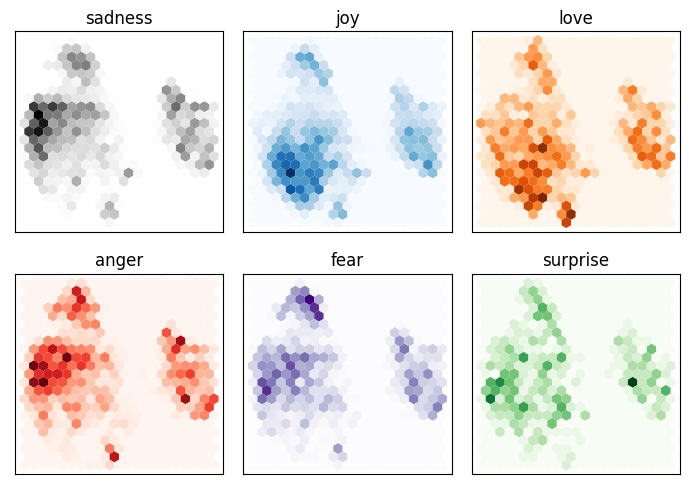

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

> 이 그림은 단지 저차원 공간으로 투영한 것임<br>일부 범주가 중첩됐다고 원본 공간에서 분리할 수 없는 것은 아님<br>이와 반대로 투영 공간에서 분리할 수 있다면 원본 공간에서도 분리할 수 있음

그래프에서 확실한 패턴이 보임

sadness, anger, fear 같은 부정적인 감정은 조금씩 다르게 분포됐지만 차지한 영역이 모두 비슷

반면 joy, love 는 부정적인 감정과 잘 분리되고 비슷한 영역을 차지함

마지막으로 surprise 는 영역 전체에 골고루 퍼져 있음

약간 분리되기를 원했지만, 모델은 감정의 차이를 구분하도록 훈련되지 않고 텍스트에서 마스킹 된 단어를 추측해 암묵적으로 감정을 학습했을 뿐임

#### 간단한 분류 모델 훈련하기

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
# 수렴을 보정하기 위해 'max_iter'를 증가시킴
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [81]:
from sklearn.dummy import DummyClassifier

In [83]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [85]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized confusion matrix')
    plt.show()

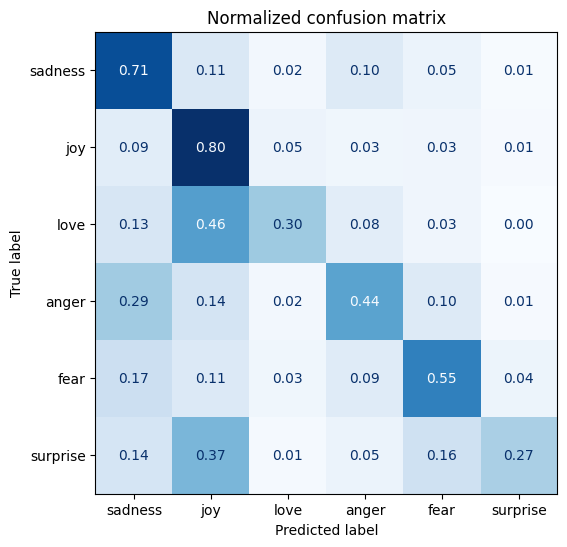

In [86]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

anger 와 fear 는 sadness 와 가장 많이 혼동됨

이는 임베딩을 시각화했을 때와 일치함

love 와 surprise 는 joy 로 많이 오인됨

### 2.3.2 트랜스포머 미세 튜닝하기

#### 사전 훈련된 모델 로드하기

In [87]:
from transformers import AutoModelForSequenceClassification

In [109]:
num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

#### 성공 지표 정의하기

In [110]:
from sklearn.metrics import accuracy_score, f1_score

In [111]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

#### 모델 훈련하기

In [112]:
from huggingface_hub import notebook_login

In [113]:
notebook_login()

액세스 토큰을 만드는 방법은 허브 문서(https://oreil.ly/IRkN1) 를 참고

In [114]:
from transformers import Trainer, TrainingArguments

In [115]:
batch_size = 64
logging_steps = len(emotion_encoded['train']) // batch_size
model_name = f'{model_ckpt}-finetuned_emotion'
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy='epoch',
                                  load_best_model_at_end=True,
                                  log_level='error')

In [116]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [117]:
from transformers import Trainer

In [118]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_encoded['train'],
                  eval_dataset=emotion_encoded['validation'],
                  tokenizer=tokenizer)
trainer.train()

/data/heerak/workspace/nlp-with-transformers/distilbert-base-uncased-finetuned_emotion is already a clone of https://huggingface.co/Heerak/distilbert-base-uncased-finetuned_emotion. Make sure you pull the latest changes with `repo.git_pull()`.
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.648743,0.787500,0.754665
2,0.827100,0.391588,0.886000,0.881785


Several commits (3) will be pushed upstream.
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=250, training_loss=0.8271158447265625, metrics={'train_runtime': 132.913, 'train_samples_per_second': 240.759, 'train_steps_per_second': 1.881, 'total_flos': 720342861696000.0, 'train_loss': 0.8271158447265625, 'epoch': 2.0})

In [120]:
preds_output = trainer.predict(emotion_encoded['validation'])

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [121]:
preds_output.metrics

{'test_loss': 0.3915884792804718,
 'test_accuracy': 0.886,
 'test_f1': 0.8817854316546611,
 'test_runtime': 3.0468,
 'test_samples_per_second': 656.436,
 'test_steps_per_second': 5.251}

In [124]:
preds_output

PredictionOutput(predictions=array([[ 3.5688977 , -0.45411325, -0.9749048 , -0.34624732, -0.47928306,
        -1.324179  ],
       [ 3.5214398 , -0.8115829 , -1.435168  , -0.22606054,  0.0185706 ,
        -1.1881    ],
       [-1.0433468 ,  2.0903785 ,  1.9144197 , -1.0969286 , -1.6284221 ,
        -0.9604809 ],
       ...,
       [-1.1188892 ,  3.561769  ,  0.7679488 , -1.6019881 , -1.518829  ,
        -0.6906873 ],
       [-1.4941018 ,  1.9391283 ,  2.1055446 , -1.4734963 , -1.3823566 ,
        -0.59736294],
       [-1.2983265 ,  3.6340914 ,  0.73770696, -1.4110942 , -1.5742164 ,
        -0.47808853]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.3915884792804718, 'test_accuracy': 0.886, 'test_f1': 0.8817854316546611, 'test_runtime': 3.0468, 'test_samples_per_second': 656.436, 'test_steps_per_second': 5.251})

In [125]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [126]:
y_preds

array([0, 0, 1, ..., 1, 2, 1])

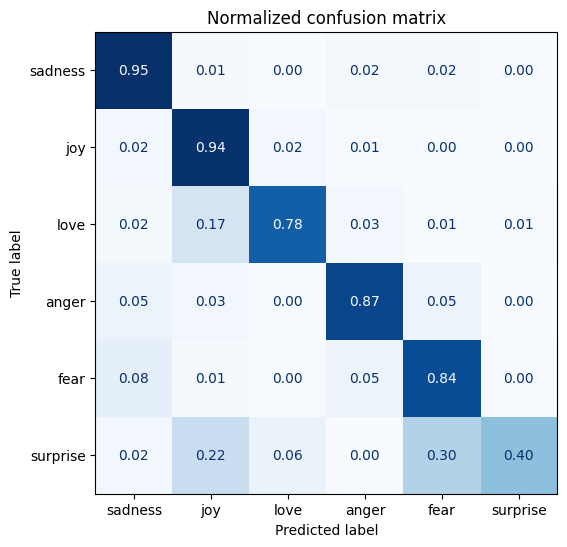

In [127]:
plot_confusion_matrix(y_preds, y_valid, labels)

#### 케라스로 미세 튜닝하기

```
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification
            .from_pretrained(model_ckpt, num_labels=num_labels))

# 텐서플로 텐서로 변환할 열 이름
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotion_encoded['train'].to_tf_dataset(
    columns=tokenizer_columns,
    label_cols=['label'],
    shuffle=True,
    batch_size=batch_size,
)
tf_eval_dataset = emotion_encoded['validation'].to_tf_dataset(
    columns=tokenizer_columns,
    label_cols=['label'],
    shuffle=False,
    batch_size=batch_size,
)

import tensorflow as tf

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)
```

#### 오류 분석

In [128]:
from torch.nn.functional import cross_entropy

In [133]:
def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동시킵니다.
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device),
                             reduction='none')
        
    # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮깁니다.
    return {'loss': loss.cpu().numpy(),
            'predicted_label': pred_label.cpu().numpy()}

In [134]:
# 데이터셋을 다시 파이토치 텐서로 변환합니다.
emotion_encoded.set_format('torch',
                           columns=['input_ids', 'attention_mask', 'label'])

# 손실 값을 계산합니다.
emotion_encoded['validation'] = emotion_encoded['validation'].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [136]:
emotion_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotion_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = (df_test['predicted_label']
                              .apply(label_int2str))

In [138]:
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.070852
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.079607
2,i feel like a faithful servant,love,joy,0.866640
3,i am just feeling cranky and blue,anger,anger,0.151023
4,i can have for a treat or if i am feeling festive,joy,joy,0.058056


##### 잘못된 레이블

##### 데이터셋의 특이사항

In [139]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,4.758586
882,i feel badly about reneging on my commitment t...,love,sadness,4.745262
1963,i called myself pro life and voted for perry w...,joy,sadness,4.425622
1950,i as representative of everything thats wrong ...,surprise,sadness,4.402074
465,i would eventually go in to these stores but i...,joy,fear,4.339877
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.295238
1274,i am going to several holiday parties and i ca...,joy,sadness,4.209935
765,i feel super awkward and out of place right now,joy,sadness,4.098799
1857,im going to be very honest with you it feels a...,surprise,joy,3.988478
1122,i feel so amazing about taking this trip as i ...,surprise,joy,3.976642


In [140]:
df_test.sort_values('loss', ascending=True).head(10)

,text,label,predicted_label,loss
1638,i feel like if you shop smart you can still ad...,joy,joy,0.050417
131,i feel like a graph doesnt show the data accur...,joy,joy,0.050570
941,i expected but it did feel hopeful and it defi...,joy,joy,0.050713
222,i am at day and i am feeling terrific,joy,joy,0.050732
578,i got to christmas feeling positive about the ...,joy,joy,0.050908
268,i did though and woke up feeling terrific,joy,joy,0.051237
1259,i feel terrific but won t hammer it home,joy,joy,0.051337
1184,im feeling quite optimistic but im still keepi...,joy,joy,0.051630
1511,i have to be overactive and stressed out to fe...,joy,joy,0.051785
229,i hope all of you epers feel terrific too,joy,joy,0.052075


#### 모델 저장 및 공유

In [141]:
trainer.push_to_hub(commit_message='Training completed!')

Upload file pytorch_model.bin:   0%|          | 4.00k/255M [00:00<?, ?B/s]

Upload file runs/Jan06_18-51-34_k8s-master1/events.out.tfevents.1672998701.k8s-master1.19726.4:  88%|########8…

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/distilbert-base-uncased-finetuned_emotion
   99039f3..92de092  main -> main

To https://huggingface.co/Heerak/distilbert-base-uncased-finetuned_emotion
   92de092..15ed6b6  main -> main



'https://huggingface.co/Heerak/distilbert-base-uncased-finetuned_emotion/commit/92de092fb3a8873d93b0e021328018bcb79488ac'

In [142]:
from transformers import pipeline

In [143]:
# `transformersbook` 을 자신의 허브 사용자 이름으로 바꾸세요.
model_id = 'Heerak/distilbert-base-uncased-finetuned_emotion'
classifier = pipeline('text-classification', model=model_id)

Downloading:   0%|          | 0.00/883 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [144]:
custom_tweet = 'I saw a movie today and it was really good.'
preds = classifier(custom_tweet, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.024148572236299515},
  {'label': 'LABEL_1', 'score': 0.9060227274894714},
  {'label': 'LABEL_2', 'score': 0.03677782788872719},
  {'label': 'LABEL_3', 'score': 0.010704896412789822},
  {'label': 'LABEL_4', 'score': 0.008465621620416641},
  {'label': 'LABEL_5', 'score': 0.013880334794521332}]]

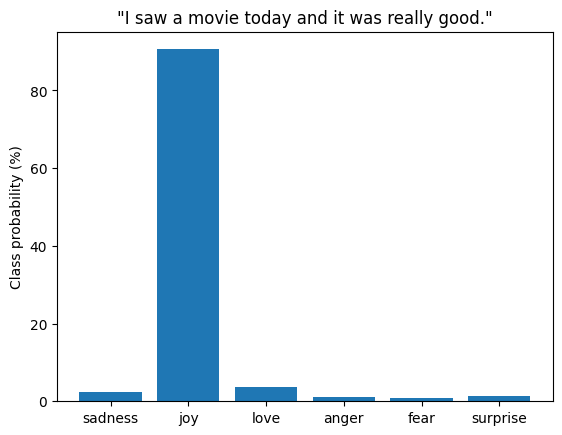

In [145]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df['score'], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel('Class probability (%)')
plt.show()